In [2]:
#Import files
import pandas as pd
import numpy as np

In [3]:
# Load the file
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.shape

(303, 14)

In [5]:
# Data information
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Checking for missing values
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## EDA

In [8]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Check the sex value counts
heart["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

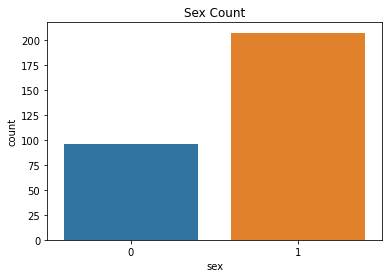

In [10]:
# Visualize this
sns.countplot(x="sex", data=heart)
plt.title("Sex Count")
plt.show()

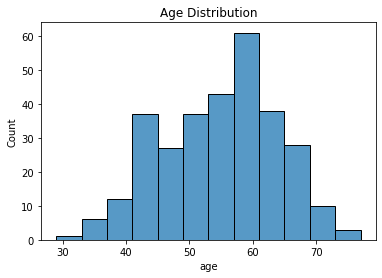

In [11]:
# Age distribution
sns.histplot(x="age", data=heart)
plt.title("Age Distribution")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

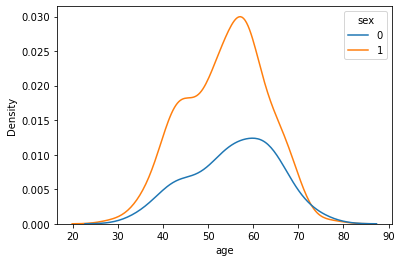

In [12]:
# Age distribution between men and women
sns.kdeplot(x="age", data=heart, hue="sex")

In [13]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Visualizing the distribution of the features across ages.

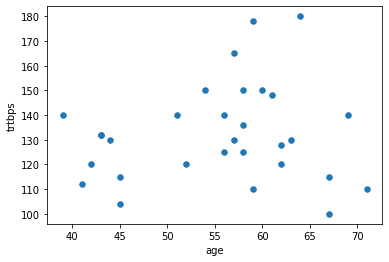

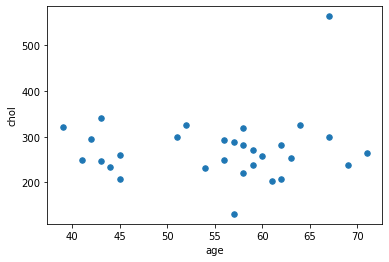

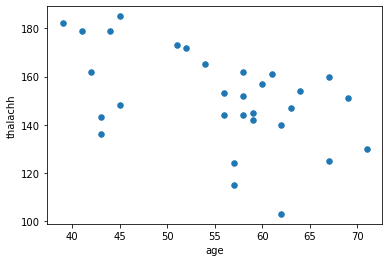

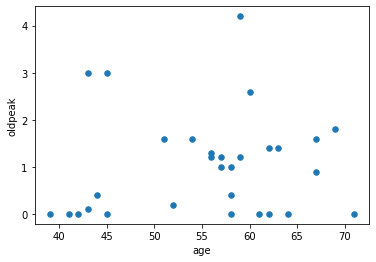

In [17]:
perc = 0.10
heart_small = heart.sample(n=int(heart.shape[0] * perc))

bases = ["trtbps", "chol", "thalachh", "oldpeak"]

for base in bases:
    heart_small.plot(x="age", y=base, kind="scatter", s=30)

## Predictions
### 1. Predict the target using `KNeighborsClassifier`

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set up random seed
np.random.seed(42)

# Create the data 
X = heart.drop("output", axis=1)
y = heart["output"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate KNN model
clf = KNeighborsClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

0.6885245901639344

In [18]:
# Make predictions
y_preds = clf.predict(X_test)
y_preds[:5]

array([0, 1, 1, 1, 0], dtype=int64)

**Evaluating our KNN model**

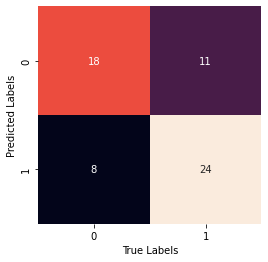

In [24]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test, y_preds)

# Function to visualize the confusion matrix
def plot_conf_mat(conf_mat):
    plt.figure(figsize=(4,4))
    sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    
plot_conf_mat(conf_mat)

In [25]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



**Improving our KNN model using `GridSearchCV`**

In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.random.seed()

# Create the data 
X = heart.drop("output", axis=1)
y = heart["output"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Grid of hyperparameters to tune
grid = {"n_neighbors": np.arange(5, 30, 5)}

# Instantiate our model
clf = KNeighborsClassifier()

# Instantiate our GridSearchCV version of our model
gs_clf = GridSearchCV(clf, grid, cv=5)

# Fit the model
gs_clf.fit(X_train, y_train);

In [34]:
# Best parameter
gs_clf.best_params_

{'n_neighbors': 25}

In [36]:
from sklearn.metrics import accuracy_score

# Make predictions
gs_y_preds = gs_clf.predict(X_test)

# Evaluate
accuracy_score(y_test, gs_y_preds)

0.7213114754098361

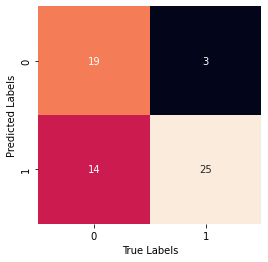

In [37]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, gs_y_preds)

plot_conf_mat(conf_mat)

In [38]:
# Classification report
print(classification_report(y_test, gs_y_preds))

              precision    recall  f1-score   support

           0       0.58      0.86      0.69        22
           1       0.89      0.64      0.75        39

    accuracy                           0.72        61
   macro avg       0.73      0.75      0.72        61
weighted avg       0.78      0.72      0.73        61



### 2. Predicting using `RandomForestClassifier`

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Create the data 
X = heart.drop("output", axis=1)
y = heart["output"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate our RandomForest model
clf = RandomForestClassifier()

# Fit
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

0.8524590163934426

In [40]:
# Make predictions
y_preds = clf.predict(X_test)

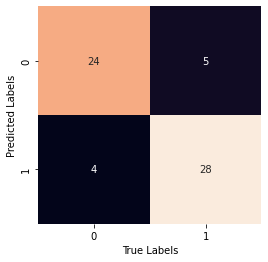

In [41]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat)

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Our `RandomForestClassifier` model performed better than the `KNeighborsClassifier` model. Therefore we will save the Random Forest Classifier for future use.